In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import keras

In [4]:
df=pd.read_csv("/home/vedant/Desktop/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df=df.drop("Time",axis=1)

In [6]:
x=df.drop("Class",axis=1)
y=df["Class"]

In [7]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
encoder=models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(16,activation="relu"),
])

2024-11-12 21:07:58.372861: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
decoder=models.Sequential([
    layers.Input((16,)),
    layers.Dense(32,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(x_train.shape[1],activation="linear"),
])

In [11]:
autoencoder=models.Sequential([
    encoder,
    decoder
])

In [12]:
autoencoder.compile(optimizer="adam",loss="mean_squared_error", metrics = ['accuracy'])

In [13]:
history=autoencoder.fit(x_train,x_train,epochs=10,validation_data=(x_test,x_test))

2024-11-12 21:07:58.839020: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26430020 exceeds 10% of free system memory.
2024-11-12 21:07:59.004448: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26430020 exceeds 10% of free system memory.


Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.4664 - loss: 0.4012 - val_accuracy: 0.7694 - val_loss: 0.0924
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7657 - loss: 0.0982 - val_accuracy: 0.7961 - val_loss: 0.0714
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 853us/step - accuracy: 0.8076 - loss: 0.0724 - val_accuracy: 0.8335 - val_loss: 0.0613
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 835us/step - accuracy: 0.8292 - loss: 0.0592 - val_accuracy: 0.7737 - val_loss: 0.0707
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 864us/step - accuracy: 0.8423 - loss: 0.0517 - val_accuracy: 0.8614 - val_loss: 0.0413
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8528 - loss: 0.0478 - val_accuracy: 0.8736 - val_loss: 0.0359
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 889us/step - accuracy: 0.8592 - loss: 0.0434 - val_accuracy: 0.8803 - val_loss: 0.0388
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 7s 999us/step - accuracy: 0.8642 - loss:

In [14]:
test_acc,test_loss = autoencoder.evaluate(x_test, x_test)
print("Test Loss: ",test_loss)
print("Accuracy ",test_acc)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 505us/step - accuracy: 0.8899 - loss: 0.0339
Test Loss:  0.8915417194366455
Accuracy  0.03302016109228134


In [15]:
predictions=autoencoder.predict(x_test)
mse=np.mean((x_test-predictions)**2,axis=1)
threshold = np.percentile(mse, 95)
outliers = mse> threshold
print("Confusion Matrix:\n", confusion_matrix(y_test, outliers))
print("Classification report:\n", classification_report(y_test, outliers))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step
Confusion Matrix:
 [[54099  2765]
 [   14    84]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.86      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.52     56962
weighted avg       1.00      0.95      0.97     56962



In [16]:
num_anomalies = np.sum(y_test[outliers] == 1)

In [17]:

print(f'Number of anomalies: {num_anomalies}')

Number of anomalies: 84


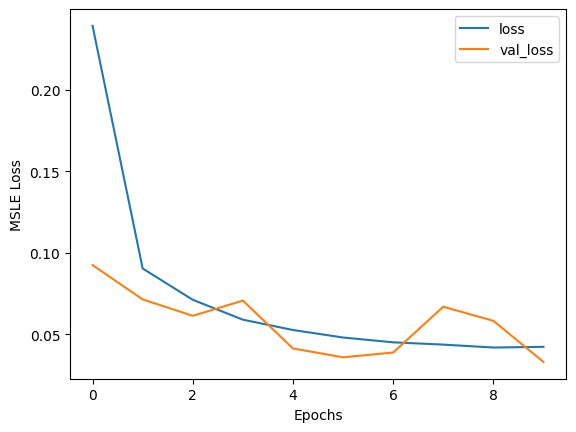

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()